In [ ]:
from PIL import Image
from torchvision import transforms
import matplotlib.pyplot as plt
import numpy as np
# read the image, resize to 224 and convert to PyTorch Tensor
pig_img = Image.open("pig.jpg")
dat=np.array(pig_img)

In [8]:
import numpy as np
dat=np.array(pig_img)
dat

array([[[103,  32,  12],
        [114,  43,  23],
        [118,  45,  26],
        ...,
        [121,  43,  21],
        [120,  42,  20],
        [120,  42,  20]],

       [[104,  33,  13],
        [115,  44,  24],
        [118,  45,  26],
        ...,
        [121,  43,  21],
        [120,  42,  20],
        [120,  42,  20]],

       [[105,  34,  14],
        [116,  45,  25],
        [118,  45,  26],
        ...,
        [121,  43,  21],
        [120,  42,  20],
        [120,  42,  20]],

       ...,

       [[123,  79,  42],
        [114,  63,  44],
        [ 98,  45,  37],
        ...,
        [106,  69,  43],
        [110,  66,  41],
        [ 95,  41,   5]],

       [[136,  90,  54],
        [108,  63,  34],
        [ 86,  41,  10],
        ...,
        [142, 106,  46],
        [122,  87,  29],
        [ 96,  61,  31]],

       [[123, 105,  43],
        [106,  89,  37],
        [ 88,  66,  16],
        ...,
        [153,  89,  51],
        [113,  71,  31],
        [ 64,  50,  24]]

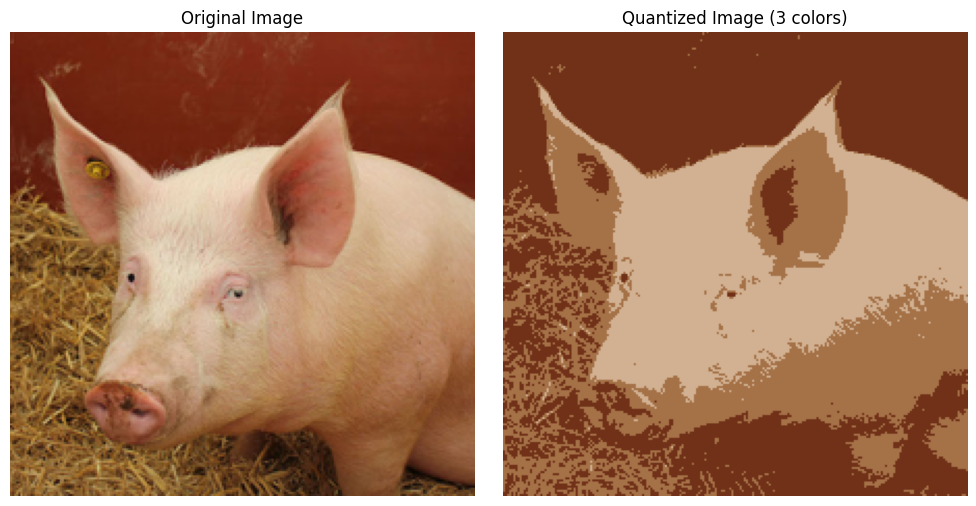

In [9]:
from PIL import Image
from torchvision import transforms
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans

# Load the image and resize it to 224x224
pig_img = Image.open("pig.jpg").resize((224, 224))
img_np = np.array(pig_img)

# Reshape the image to a 2D array of pixels: (num_pixels, 3)
h, w, c = img_np.shape
pixels = img_np.reshape(-1, 3)

# Apply KMeans clustering to quantize colors to 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(pixels)
cluster_centers = kmeans.cluster_centers_.astype("uint8")
labels = kmeans.labels_

# Replace each pixel with its cluster center color
quantized_pixels = cluster_centers[labels]
quantized_img = quantized_pixels.reshape(h, w, 3)

# Plot original and quantized image side by side
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(img_np)
plt.axis("off")

plt.subplot(1, 2, 2)
plt.title("Quantized Image (3 colors)")
plt.imshow(quantized_img)
plt.axis("off")

plt.tight_layout()
plt.show()


In [13]:
cluster_centers.shape
cluster_centers[labels].shape

(50176, 3)

In [10]:
cluster_centers

array([[209, 177, 146],
       [165, 113,  71],
       [112,  49,  24]], dtype=uint8)